# Import module

The link to get [ImageAnalysis3](https://github.com/zhengpuas47/ImageAnalysis3) 

Or from the Zhuang lab archived [source_tools](https://github.com/ZhuangLab/Chromatin_Analysis_2020_cell/tree/master/sequential_tracing/source)

## ImageAnalysis3 and basic modules

In [1]:
%run "C:\Users\shiwei\Documents\ImageAnalysis3\required_files\Startup_py3.py"
sys.path.append(r"C:\Users\shiwei\Documents")

import ImageAnalysis3 as ia
from ImageAnalysis3 import *
from ImageAnalysis3.classes import _allowed_kwds

import h5py
import ast
import pandas as pd

print(os.getpid())

20456


## Chromatin_analysis_tools etc

See **functions** in the repository for [AnalysisTool_Chromatin](../../README.md)

In [2]:
# Chromatin_analysis_tools (ATC)
# Get path for the py containing functions
import os
import sys
import importlib
module_path =r'C:\Users\shiwei\Documents\AnalysisTool_Chromatin'
if module_path not in sys.path:
    sys.path.append(module_path)
    
# import relevant modules
import gene_selection 
importlib.reload(gene_selection)
import gene_to_loci
importlib.reload(gene_to_loci)
import gene_activity
importlib.reload(gene_activity)
import loci_1d_features
importlib.reload(loci_1d_features)  

import atac_to_loci
importlib.reload(atac_to_loci)

<module 'atac_to_loci' from 'C:\\Users\\shiwei\\Documents\\AnalysisTool_Chromatin\\atac_to_loci.py'>

# Define folders

In [3]:
# main folder for postanalysis
postanalysis_folder = r'L:\Shiwei\postanalysis_2024\v0'
# input files for postanalysis
input_folder = os.path.join(postanalysis_folder, 'resources_from_preprocess')

# output file to be generated
output_main_folder = os.path.join(postanalysis_folder, 'higher_order_chromosome')

output_analysis_folder = os.path.join(output_main_folder, 'analysis')
output_figure_folder = os.path.join(output_main_folder, 'figures')

# make new folder if needed
make_output_folder = True

if make_output_folder and not os.path.exists(output_analysis_folder):
    os.makedirs(output_analysis_folder)
    print(f'Generating analysis folder: {output_analysis_folder}.')
elif os.path.exists(output_analysis_folder):
    print(f'Use existing analysis folder: {output_analysis_folder}.')
    
if make_output_folder and not os.path.exists(output_figure_folder):
    os.makedirs(output_figure_folder)
    print(f'Generating figure folder: {output_figure_folder}.')
elif os.path.exists(output_figure_folder):
    print(f'Use existing figure folder: {output_figure_folder}.')

Use existing analysis folder: L:\Shiwei\postanalysis_2024\v0\higher_order_chromosome\analysis.
Use existing figure folder: L:\Shiwei\postanalysis_2024\v0\higher_order_chromosome\figures.


# Plotting parameters

In [4]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
plt.rc('font', family='serif')
plt.rc('font', serif='Arial')

from ImageAnalysis3.figure_tools import _double_col_width, _single_col_width, _font_size, _ticklabel_size,_ticklabel_width

import seaborn as sns
sns.set_context("paper", rc={"font.size":_font_size,"axes.titlesize":_font_size+1,"axes.labelsize":_font_size})  

In [5]:
# Other required plotting parameters
_dpi = 300
_font_size = 7
_page_width = 5.5


## cell type color-codes

In [6]:
# cell labels from RNA-MERFISH and celltype prediction
selected_cell_labels = ['L2/3 IT','L4/5 IT','L5 IT','L6 IT','L5 ET','L5/6 NP','L6 CT','L6b',
                           'Sst','Pvalb','Lamp5','Sncg','Vip',
                           'Astro','Oligo','OPC','Micro','Endo','VLMC','SMC','Peri', 
                           #'other',
                          ]
# cell palette from RNA-MERFISH UMAP and stats
celltype_palette = {'Astro':'lightcoral', 
                    'Endo':'skyblue', 
                    'L2/3 IT':'gold', 
                    'L4/5 IT':'darkorange', 
                    'L5 ET':'mediumseagreen', 
                    'L5 IT':'aqua',
                    'L5/6 NP':'darkgreen',
                    'L6 CT':'brown',
                    'L6 IT':'magenta',
                    'L6b':'blue', 
                    'Lamp5':'orange', 
                    'Micro':'peachpuff',
                    'OPC':'thistle', 
                    'Oligo':'darkviolet',
                    'Peri':'sandybrown',
                    'Pvalb':'springgreen',
                    'SMC':'rosybrown',
                    'Sncg':'darkkhaki',
                    'Sst':'steelblue', 
                    'VLMC':'saddlebrown', 
                    'Vip':'red',
                    'other':'slategray'}


In [7]:
# this is the plotting order noted based on the snRNA transcriptional acitivty if needed
sorted_cellplot_order_byRNA = ['Micro', 'Oligo', 'Endo', 'OPC', 'Astro', 'Vip', 'Lamp5',
                  'L5/6 NP', 'Sst', 'Sncg', 'Pvalb', 'L4/5 IT', 'L6 CT',
                  'L6 IT', 'L6b', 'L2/3 IT', 'L5 IT', 'L5 ET']

# Load data relevant information

## load and format codebook

[merged codebook](../resources/merged_codebook.csv) as in the repository (merged for all DNA-MERFISH libraries)

In [8]:
# Load codebook 
codebook_fname = os.path.join(input_folder,'merged_codebook.csv')
codebook_df = pd.read_csv (codebook_fname, index_col=0)

# sort df by chr and chr_order
codebook_df = loci_1d_features.sort_loci_df_by_chr_order (codebook_df)
codebook_df.head()

,name,id,NDB_784,NDB_755,NDB_826,NDB_713,NDB_865,NDB_725,NDB_817,NDB_710,...,NDB_479,NDB_562,NDB_608,NDB_460,NDB_563,NDB_592,NDB_368,NDB_436,NDB_629,NDB_604
0,1:3742742-3759944,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1:6245958-6258969,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1:8740008-8759916,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1016,1:9627926-9637875,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1017,1:9799472-9811359,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [9]:
# Format the chr loci name by 
# 1. changing loci name format
# 2. extract relevant information such as id, chr, chr_order, and library etc
from gene_to_loci import loci_pos_format
loci_name_list = list(map(loci_pos_format, codebook_df['name'].tolist()))
loci_name_arr = np.array(loci_name_list)

# convert to a new dataframe and set loci name as index
codebook_df = codebook_df[['name','id','chr','chr_order','library']]
codebook_df['loci_name'] = list(loci_name_arr[:,0])
codebook_df = codebook_df.set_index ('loci_name')

codebook_df.head()

,name,id,chr,chr_order,library
loci_name,,,,,
chr1_3742742_3759944,1:3742742-3759944,1,1,0.0,CTP11
chr1_6245958_6258969,1:6245958-6258969,2,1,1.0,CTP11
chr1_8740008_8759916,1:8740008-8759916,3,1,2.0,CTP11
chr1_9627926_9637875,1:9627926-9637875,1,1,3.0,CTP13
chr1_9799472_9811359,1:9799472-9811359,2,1,4.0,CTP13


# Load AB assignment

Data below can be generated from notebook:

[4_ab_compartment_by_ensemble_assignment_by_CG](4_ab_compartment_by_ensemble_assignment_by_CG.ipynb)

In [10]:
AB_summary_df = pd.read_csv(os.path.join(output_analysis_folder,
                                         'AB_assignment_CG_by_pm_majorType.csv'), index_col=0)

AB_summary_df

,Astro,Endo,GABA,Gluta,Micro,Oligo
loci_name,,,,,,
chr1_3742742_3759944,B,A,B,B,B,B
chr1_6245958_6258969,A,A,B,B,B,B
chr1_8740008_8759916,B,B,B,B,B,B
chr1_9627926_9637875,A,A,B,B,A,B
chr1_9799472_9811359,A,A,B,B,A,A
...,...,...,...,...,...,...
chrX_163750534_163758706,unassigned,unassigned,unassigned,unassigned,unassigned,unassigned
chrX_166247682_166259932,unassigned,unassigned,unassigned,unassigned,unassigned,unassigned
chrX_167157164_167167452,unassigned,unassigned,unassigned,unassigned,unassigned,unassigned


In [11]:
majorType_2_subclass_dict = {'Oligo':'Oligo', 'OPC':'Oligo',
                             'Micro':'Micro','Astro':'Astro','Endo':'Endo','Peri':'Endo',
                             'L2/3 IT':'Gluta','L4/5 IT':'Gluta','L5 IT':'Gluta',
                             'L6 IT':'Gluta','L5 ET':'Gluta','L6 CT':'Gluta',
                             'L5/6 NP':'Gluta','L6b':'Gluta',
                             'Vip':'GABA','Pvalb':'GABA',
                             'Lamp5':'GABA','Sst':'GABA','Vip':'GABA','Sncg':'GABA',
                            }

AB_summary_dict = {}
for _celltype, _majorType in majorType_2_subclass_dict.items():
    _AB_id_list = AB_summary_df[_majorType]
    AB_summary_dict [_celltype] = _AB_id_list

AB_summary_df = pd.DataFrame(AB_summary_dict)    
AB_summary_df.head()

,Oligo,OPC,Micro,Astro,Endo,Peri,L2/3 IT,L4/5 IT,L5 IT,L6 IT,L5 ET,L6 CT,L5/6 NP,L6b,Vip,Pvalb,Lamp5,Sst,Sncg
loci_name,,,,,,,,,,,,,,,,,,,
chr1_3742742_3759944,B,B,B,B,A,A,B,B,B,B,B,B,B,B,B,B,B,B,B
chr1_6245958_6258969,B,B,B,A,A,A,B,B,B,B,B,B,B,B,B,B,B,B,B
chr1_8740008_8759916,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B,B
chr1_9627926_9637875,B,B,A,A,A,A,B,B,B,B,B,B,B,B,B,B,B,B,B
chr1_9799472_9811359,A,A,A,A,A,A,B,B,B,B,B,B,B,B,B,B,B,B,B


# Load spatial distances and other info

In [12]:
# class to median distance dict
class_2_median_filename = os.path.join(input_folder, 'subclass_2_medianDict.pkl')
class_2_medianDict = pickle.load(open(class_2_median_filename, 'rb'))
print(class_2_medianDict.keys())

dict_keys(['Oligo', 'L5 IT', 'Micro', 'Peri', 'Endo', 'Astro', 'OPC', 'L6 CT', 'L5 ET', 'L5/6 NP', 'Pvalb', 'L6 IT', 'Lamp5', 'L6b', 'Sst', 'SMC', 'L4/5 IT', 'L2/3 IT', 'Vip', 'Sncg', 'VLMC'])


In [13]:
class_2_info_filename = os.path.join(input_folder, 'subclass_2_cellInfo.pkl')
class_2_infoDict = pickle.load(open(class_2_info_filename, 'rb'))
# inspect cell numbers for quality control
for _cls, _info_list in class_2_infoDict.items():
    print(_cls, len(_info_list))

Oligo 6605
L5 IT 3337
Micro 1836
Peri 957
Endo 3738
Astro 4970
OPC 1452
L6 CT 5602
L5 ET 1624
L5/6 NP 784
Pvalb 1317
L6 IT 2428
Lamp5 540
L6b 1044
Sst 1031
SMC 632
L4/5 IT 3388
L2/3 IT 3966
Vip 422
Sncg 173
VLMC 494


# Calculate AB segregation

## functions and parameters

In [14]:
from scipy.spatial.distance import squareform, pdist

In [15]:
## function for AB squareform to get A-A, B-B, and A-B pair types
def pairwise_AB_str_map (AB_str_list, all_combinations):
    """
    Generate all pairwise concatenations of string elements in a list.
    """
    n = len(AB_str_list)
    result = []
    for i in range(n):
        for j in range(i+1, n):
            # Concatenate strings at positions i and j
            concatenated = AB_str_list[i] + AB_str_list[j]
            # convert strs like AB to BA
            if concatenated[0]!=concatenated[1]:
                if all_combinations.index(concatenated[0])>all_combinations.index(concatenated[1]):
                    concatenated = concatenated[1]+concatenated[0]
            result.append(concatenated)
            
    return squareform(result)

In [16]:
def get_key_by_value(dictionary, value):
    for key, val in dictionary.items():
        if value in val:
            return key
    return None  # If value not found

In [17]:
# function to normalize cell types by polynormial
def normalize_map_byPoly (map_x, map_y, deg_norm =2, norm_scale ='log'):
    # 1. map in NxN matrix format
    map_x_entries = map_x[np.triu_indices(len(map_x),1)]
    map_y_entries = map_y[np.triu_indices(len(map_y),1)]
    
    # 2. normalize by polynormial
    # proceed depending if the relationship is expected to occur on which scale
    if norm_scale =='log':
        valid_inds = np.isfinite(np.log(map_x_entries)) & np.isfinite(np.log(map_y_entries))
    elif norm_scale =='linear':
        valid_inds = np.isfinite(map_x_entries) & np.isfinite(map_y_entries)
        
    map_x_entries = map_x_entries[valid_inds]
    map_y_entries = map_y_entries[valid_inds]
    
    # proceed depending if the relationship is expected to occur on which scale
    if norm_scale =='log':
        _polyFit = np.polyfit(np.log(map_x_entries), np.log(map_y_entries) ,deg=deg_norm) 
        map_y_Predict = np.exp(np.polyval(_polyFit, np.log(map_x)))
    elif norm_scale =='linear':
        _polyFit = np.polyfit(map_x_entries, map_y_entries,deg=deg_norm) 
        map_y_Predict = np.polyval(_polyFit, map_x)
        
    return map_y_Predict


In [18]:
# whether and how to normalize between cell types (e.g., regress out absolute chromosome size difference)
normalize_btw_celltype = True
#norm_btw_celltype_method = 'regression'
norm_btw_celltype_method = 'median'

fit_deg = 2
# common celltype to normalize
common_celltype = 'Endo'

In [19]:
# inspect cell numbers for quality control
sel_class_list = []
for _cls, _info_list in class_2_infoDict.items():
    #print(_cls, len(_info_list))
    if len(_info_list) >= len(class_2_infoDict['Peri']): # Peri does not have A/B assignment
        sel_class_list.append(_cls)
        
np.array(sel_class_list)


array(['Oligo', 'L5 IT', 'Micro', 'Peri', 'Endo', 'Astro', 'OPC', 'L6 CT',
       'L5 ET', 'Pvalb', 'L6 IT', 'L6b', 'Sst', 'L4/5 IT', 'L2/3 IT'],
      dtype='<U7')

In [20]:
# chr1-chr19 (A/B not assigned for chrX)
sort_chroms = [str(_ch) for _ch in range(1,20)]

## process

In [21]:
# chr to plot
gcutoff  = 1e7
AB_seg_summary = {'celltype':[], 'chr':[], 'AB segregation':[]}

assert norm_btw_celltype_method == 'regression' or norm_btw_celltype_method == 'median', 'Unknown methods.'

for sel_chr in sort_chroms[:]:

    _chr_codebook = codebook_df.loc[codebook_df['chr']==sel_chr]
    _region_centers = np.sort([np.mean(np.array(_n.split(sel_chr+':')[1].split('-'), dtype=np.int32)) 
                               for _n in _chr_codebook['name']])

    dist_entries_dict = {'celltype':[], 'genomic_distance':[], 
                         'spatial_distance':[], 'fitted_spatial_distance':[], 
                         'AB_type':[], 'AB_type_v2':[], 
                        }

    # init dict to save a fitted line for plotting later if needed
    fit_dict = {}

    common_mat = class_2_medianDict[common_celltype][f'cis_{sel_chr}']

    for _celltype in sel_class_list[:]:
        median_mat = class_2_medianDict[_celltype][f'cis_{sel_chr}']

        # normalize to common celltype or not
        if normalize_btw_celltype:
            if norm_btw_celltype_method =='regression':
                median_mat = normalize_map_byPoly (median_mat,common_mat, deg_norm = 1, norm_scale ='linear')
            elif norm_btw_celltype_method =='median':
                median_ratio = np.nanmedian(median_mat)/np.nanmedian(common_mat)
                median_mat = median_mat / median_ratio


        gdist_mat = squareform(pdist(_region_centers[:,np.newaxis]))

        # keep original entries for later mask operation in case
        ori_gdist_entries = gdist_mat[np.triu_indices(len(gdist_mat),1)]
        ori_median_entries = median_mat[np.triu_indices(len(median_mat),1)]

        # fit gdist and median dist
        valid_inds = np.isfinite(np.log(ori_gdist_entries)) & np.isfinite(np.log(ori_median_entries))
        gdist_entries = ori_gdist_entries[valid_inds]
        median_entries = ori_median_entries[valid_inds]
        median_lr = scipy.stats.linregress(np.log(gdist_entries), np.log(median_entries))
        median_poly = np.polyfit(np.log(gdist_entries), np.log(median_entries) ,deg=2)
        # save fitted distance
        y_fit = np.exp(np.polyval(median_poly, np.log(ori_gdist_entries)))
        # save a fitted line for plotting later if needed
        gdist_plot = np.linspace(gdist_entries .min(), gdist_entries.max(), 200)
        y_plot = np.exp(np.polyval(median_poly, np.log(gdist_plot)))
        fit_dict[_celltype] = [gdist_plot, y_plot]

        # get AB matrix 
        AB_assignment_chr = AB_summary_df.loc[_chr_codebook.index][_celltype].tolist()
        AB_str_map = pairwise_AB_str_map (AB_assignment_chr, ['A','B'])

        for _type_idx, _AB_type in enumerate(['AA', 
                                              'BB',
                                              'AB'
                                                 ]):

            ABmask = AB_str_map == _AB_type
            mask = ABmask 

            mask_entries = mask[np.triu_indices(len(mask),1)]
            median_entries_byMask = ori_median_entries[mask_entries]
            gdist_entries_byMask = ori_gdist_entries[mask_entries]

            dist_entries_dict['celltype'].extend([_celltype]*len(median_entries_byMask))
            dist_entries_dict['AB_type'].extend([_AB_type]*len(median_entries_byMask))
            if _AB_type == 'AB':
                dist_entries_dict['AB_type_v2'].extend(['AB']*len(median_entries_byMask))
            else:
                dist_entries_dict['AB_type_v2'].extend(['AA or BB']*len(median_entries_byMask))

            dist_entries_dict['genomic_distance'].extend(gdist_entries_byMask)
            dist_entries_dict['spatial_distance'].extend(median_entries_byMask)


        dist_entries_dict['fitted_spatial_distance'].extend(y_fit)


    dist_entries_df = pd.DataFrame(dist_entries_dict)
    
    # summarize median for AB segregation
    for _celltype in np.unique(dist_entries_df['celltype']):

        sel_dist_entries_df = dist_entries_df[(dist_entries_df['celltype']==_celltype) & 
                                              (dist_entries_df['genomic_distance']<gcutoff)].copy(deep=True)

        _dist_AABB =  sel_dist_entries_df[sel_dist_entries_df['AB_type_v2'] == 'AA or BB']
        _dist_AB =  sel_dist_entries_df[sel_dist_entries_df['AB_type_v2'] == 'AB']
        
        _AB_segregation = abs(np.nanmedian(_dist_AABB['spatial_distance']) - 
                                                 np.nanmedian(_dist_AB['spatial_distance']))

        AB_seg_summary['AB segregation'].append(_AB_segregation)
        AB_seg_summary['celltype'].append(_celltype)
        AB_seg_summary['chr'].append(sel_chr)

In [22]:
AB_seg_summary_df = pd.DataFrame(AB_seg_summary)
AB_seg_summary_df

,celltype,chr,AB segregation
0,Astro,1,0.107228
1,Endo,1,0.060670
2,L2/3 IT,1,0.271863
3,L4/5 IT,1,0.267408
4,L5 ET,1,0.232394
...,...,...,...
280,OPC,19,0.148835
281,Oligo,19,0.113144
282,Peri,19,0.059024
283,Pvalb,19,0.195805


# Calculate megadomain strength

## function and parameters

In [23]:
def megadomain_strength_score_medianMap (class2_chrMap, megadomain_dict):
    domain_A_inds = np.arange(len(class2_chrMap))[megadomain_dict['m1']]
    domain_B_inds = np.arange(len(class2_chrMap))[megadomain_dict['m2']]
    
    # calculate intra-domain dists
    intra_dists = []
    for _inds in [domain_A_inds, domain_B_inds]:
        _domainMap = class2_chrMap[_inds,:][:,_inds]
        rows, cols = np.triu_indices_from(_domainMap, k=1)
        # Use the indices to extract the values from the matrix
        upper_triangle_values = _domainMap[rows, cols]
        intra_dists.extend(upper_triangle_values)
        
    average_intra_distance = np.nanmedian(intra_dists)
    
    # calculate inter-domain dists
    inter_dists = []
    _domainMap = class2_chrMap[domain_A_inds,:][:,domain_B_inds]
    average_inter_distance = np.nanmedian(_domainMap)
    
    #segreg_score = average_intra_distance/average_inter_distance
    strength_score = -((average_intra_distance - average_inter_distance) / 
                     (average_intra_distance + average_inter_distance))
    
    strength_score_byRatio = average_inter_distance/average_intra_distance
    return strength_score, strength_score_byRatio

In [24]:
# megadomain boundary by inspecting the distmap and insulation profiles in non-neuronal cells
megadomain_boundry_byChr = {'1':89, '2':70, '3':55,
                            '6':55, '7':30,'8':42,'12':35,'14':65}

# use normalized map fpr megadomain strength for not
use_normMap_for_megadomain = True

## process

In [25]:
strength_dict_byMedianMap = {'celltype':[], 'chr':[], 'strength_score':[], 'strength_score_byRatio': []}


# loop for each chromosome
for sel_chr, domain_boundry in megadomain_boundry_byChr.items():
#for sel_chr, domain_boundry in zip(['1'],[89]):

    _chr_codebook = codebook_df.loc[codebook_df['chr']==sel_chr]
    megadomain_dict = {'m1': [i for i in range(len(codebook_df[codebook_df['chr']==sel_chr])) if i <=domain_boundry], 
             'm2': [i for i in range(len(codebook_df[codebook_df['chr']==sel_chr])) if i > domain_boundry]}

    
    # common celltype to normalize
    common_celltype = 'Endo'
    common_mat = class_2_medianDict[common_celltype][f'cis_{sel_chr}']
        
    # cell type X to predict Y
    for _cell_idx, toRef_celltype in enumerate(sel_class_list):
        toRef_mat = class_2_medianDict[toRef_celltype][f'cis_{sel_chr}']
        
        # normalize to common celltype or not
        if normalize_btw_celltype:
            if norm_btw_celltype_method =='regression':
                toRef_mat_normed = normalize_map_byPoly (toRef_mat,common_mat, deg_norm = 1, norm_scale ='linear')
            elif norm_btw_celltype_method =='median':
                median_ratio = np.nanmedian(toRef_mat)/np.nanmedian(common_mat)
                toRef_mat_normed = toRef_mat / median_ratio
        else:
            toRef_mat_normed = toRef_mat
        
        # calculate strength
        if use_normMap_for_megadomain:
            strength_score, strength_score_byRatio = megadomain_strength_score_medianMap (toRef_mat_normed, 
                                                                                          megadomain_dict)
        else: # this bypass the above normalization results
            strength_score, strength_score_byRatio = megadomain_strength_score_medianMap (toRef_mat,
                                                                                          megadomain_dict)
            
        strength_dict_byMedianMap['celltype'].append(toRef_celltype)
        strength_dict_byMedianMap['chr'].append(sel_chr)
        strength_dict_byMedianMap['strength_score'].append(strength_score)
        strength_dict_byMedianMap['strength_score_byRatio'].append(strength_score_byRatio)
        
strength_df = pd.DataFrame(strength_dict_byMedianMap)
strength_df

,celltype,chr,strength_score,strength_score_byRatio
0,Oligo,1,0.147888,1.347110
1,L5 IT,1,0.103210,1.230176
2,Micro,1,0.131889,1.303853
3,Peri,1,0.161902,1.386355
4,Endo,1,0.155611,1.368576
...,...,...,...,...
115,L6 IT,14,0.057033,1.120966
116,L6b,14,0.073828,1.159427
117,Sst,14,0.066059,1.141463
118,L4/5 IT,14,0.057498,1.122010


# Correlate AB segregation and megadomain strength

In [26]:
# check methods that were used
print(norm_btw_celltype_method)
print(normalize_btw_celltype)
print(use_normMap_for_megadomain)

median
True
True


## merge results

In [27]:
# map results above by chr by cell type
_map_AB_megadomain_res_dict = {(_cell, _chr):v for _cell, _chr, v in zip(AB_seg_summary_df['celltype'],
                                                                           AB_seg_summary_df['chr'],
                                                                           AB_seg_summary_df['AB segregation'])}


def res_byChr_byCelltype_map (_celltype, _chr, _map_AB_megadomain_res_dict=_map_AB_megadomain_res_dict):
    return _map_AB_megadomain_res_dict[(_celltype, _chr)]


df_plot = strength_df.copy(deep=True)
df_plot['AB segregation'] = df_plot.apply(lambda row: res_byChr_byCelltype_map(row['celltype'], row['chr']), axis=1)
df_plot.head(10)

,celltype,chr,strength_score,strength_score_byRatio,AB segregation
0,Oligo,1,0.147888,1.347110,0.099938
1,L5 IT,1,0.103210,1.230176,0.255148
2,Micro,1,0.131889,1.303853,0.107392
3,Peri,1,0.161902,1.386355,0.056687
4,Endo,1,0.155611,1.368576,0.060670
5,Astro,1,0.142213,1.331581,0.107228
6,OPC,1,0.138216,1.320767,0.090073
7,L6 CT,1,0.098058,1.217439,0.256392
8,L5 ET,1,0.116497,1.263717,0.232394
9,Pvalb,1,0.075903,1.164275,0.218754


## plot figures

meta NOT subset; don't know how to subset; dropped


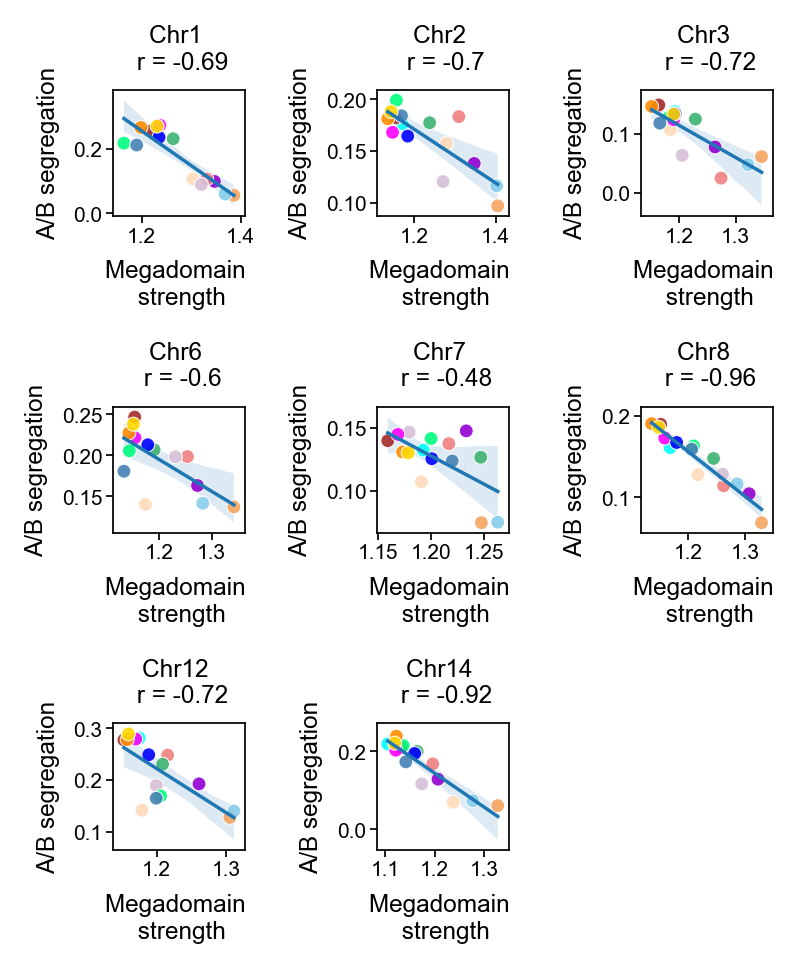

In [28]:
from scipy.stats import spearmanr

fig, ax =plt.subplots(3, 3, figsize=(1.1*3,1.3*3), dpi=250)
axs_flat = ax.flatten()

for _idx, sel_chr in enumerate(megadomain_boundry_byChr.keys()):

    _data = df_plot[df_plot['chr']==sel_chr].copy(deep=True)

    x_col, y_col = 'strength_score_byRatio', f'AB segregation'
    
    gfg = sns.regplot(data=_data, x= x_col, y = y_col, ax=axs_flat[_idx],
                  ci=95,scatter=False,
                  line_kws={'linewidth':1}
                 )
    
    sns.scatterplot(data =_data, x=x_col, y=y_col, 
                    s=16,alpha=0.9,
                    ax=axs_flat[_idx], hue='celltype', palette=celltype_palette, legend=False)

    r_val = spearmanr(_data[x_col].values, _data[y_col].values, nan_policy='omit')[0]
    axs_flat[_idx].set_title(f'Chr{sel_chr} \n r = {round(r_val,2)}', fontsize=7)
    axs_flat[_idx].set_ylabel(f'A/B segregation', fontsize=7)
    axs_flat[_idx].set_xlabel('Megadomain \n strength', fontsize=7)
    
    axs_flat[_idx].tick_params(axis='both', which='both', labelsize = 6,
                         length=2, width=0.5, pad=1, 
                         direction='out', bottom=True, left=True
                        #labelleft=True, labelbottom=True,labelright=False, labeltop=False,
                           )
    
    axs_flat[_idx].margins(x=0.1, y=0.1)
    [i[1].set_linewidth(0.5) for i in axs_flat[_idx].spines.items()]


plt.tight_layout()
plt.subplots_adjust(hspace=1.5, wspace=1.0)

fig.delaxes(axs_flat[-1])


fig.savefig(os.path.join(output_figure_folder, f"scatter_AB_segregation_vs_megadomain_bymajorType.pdf"),
                transparent=True, bbox_inches='tight', pad_inches=0.1, dpi=300)
plt.show()